In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#CLUSTERING MENGGUNAKAN K-MEANS¶
#ambil data
data= pd.read_excel('kota_indonesia.xlsx')
print(data)

              Kota  Jumlah Penduduk (juta jiwa)  Luas Wilayah (km²)  \
0          Jakarta                         10.5                 662   
1         Surabaya                          2.9                 350   
2          Bandung                          2.5                 167   
3            Medan                          2.4                 265   
4         Makassar                          1.5                 199   
5         Semarang                          1.7                 373   
6       Yogyakarta                          0.4                  32   
7        Palembang                          1.6                 400   
8         Denpasar                          0.9                 127   
9       Balikpapan                          0.7                 503   
10     Banjarmasin                          0.6                  98   
11       Pontianak                          0.6                 107   
12           Batam                          1.1                 715   
13    

In [8]:
# Mengambil bagian data dari dataset
X = np.array(data.iloc[:, 1:4])  # Ambil semua kolom dari 1 sampai 4
print("Bagian data: ")
# Menampilkan data dalam format yang lebih mudah dibaca
for row in X:
    print([f"{value:.2f}" for value in row])  # Format 2 desimal

# Membuat grafik data
# 1. Memindah tiap kolom data ke variabel grafik
x1 = np.array(data['Jumlah Penduduk (juta jiwa)'])
x2 = np.array(data['Luas Wilayah (km²)'])
x3 = np.array(data['Tingkat Pengangguran (%)'])
x4 = np.array(data['PDRB per Kapita (juta rupiah)'])

Bagian data: 
['10.50', '662.00', '7.50']
['2.90', '350.00', '6.00']
['2.50', '167.00', '7.00']
['2.40', '265.00', '5.80']
['1.50', '199.00', '5.00']
['1.70', '373.00', '5.30']
['0.40', '32.00', '4.80']
['1.60', '400.00', '6.50']
['0.90', '127.00', '4.00']
['0.70', '503.00', '5.20']
['0.60', '98.00', '4.90']
['0.60', '107.00', '5.50']
['1.10', '715.00', '4.30']
['0.80', '145.00', '6.00']
['0.80', '718.00', '5.00']
['1.20', '632.00', '6.20']
['0.50', '157.00', '5.70']
['0.90', '695.00', '5.90']
['1.00', '197.00', '5.40']
['0.50', '61.00', '5.10']


In [9]:
#Tahap Clustering K-Means¶
# Preprocessing: Normalisasi data dengan Min Max Scaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[1.        , 0.91836735, 1.        ],
       [0.24752475, 0.46355685, 0.57142857],
       [0.20792079, 0.196793  , 0.85714286],
       [0.1980198 , 0.33965015, 0.51428571],
       [0.10891089, 0.24344023, 0.28571429],
       [0.12871287, 0.49708455, 0.37142857],
       [0.        , 0.        , 0.22857143],
       [0.11881188, 0.53644315, 0.71428571],
       [0.04950495, 0.13848397, 0.        ],
       [0.02970297, 0.68658892, 0.34285714],
       [0.01980198, 0.09620991, 0.25714286],
       [0.01980198, 0.10932945, 0.42857143],
       [0.06930693, 0.99562682, 0.08571429],
       [0.03960396, 0.16472303, 0.57142857],
       [0.03960396, 1.        , 0.28571429],
       [0.07920792, 0.87463557, 0.62857143],
       [0.00990099, 0.18221574, 0.48571429],
       [0.04950495, 0.9664723 , 0.54285714],
       [0.05940594, 0.24052478, 0.4       ],
       [0.00990099, 0.04227405, 0.31428571]])

In [19]:
# Membuat model K-means. Proses clustering disini
model=KMeans(n_clusters=3,random_state=42).fit(x_scaled)
# Menampilkan Pusat cluetering
print(model.cluster_centers_)

[[0.09529703 0.75255102 0.44285714]
 [0.06570657 0.15942221 0.39480519]
 [1.         0.91836735 1.        ]]


C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
#Memberi label kluster
data['kluster'] = model.labels_
print(data)

              Kota  Jumlah Penduduk (juta jiwa)  Luas Wilayah (km²)  \
0          Jakarta                         10.5                 662   
1         Surabaya                          2.9                 350   
2          Bandung                          2.5                 167   
3            Medan                          2.4                 265   
4         Makassar                          1.5                 199   
5         Semarang                          1.7                 373   
6       Yogyakarta                          0.4                  32   
7        Palembang                          1.6                 400   
8         Denpasar                          0.9                 127   
9       Balikpapan                          0.7                 503   
10     Banjarmasin                          0.6                  98   
11       Pontianak                          0.6                 107   
12           Batam                          1.1                 715   
13    

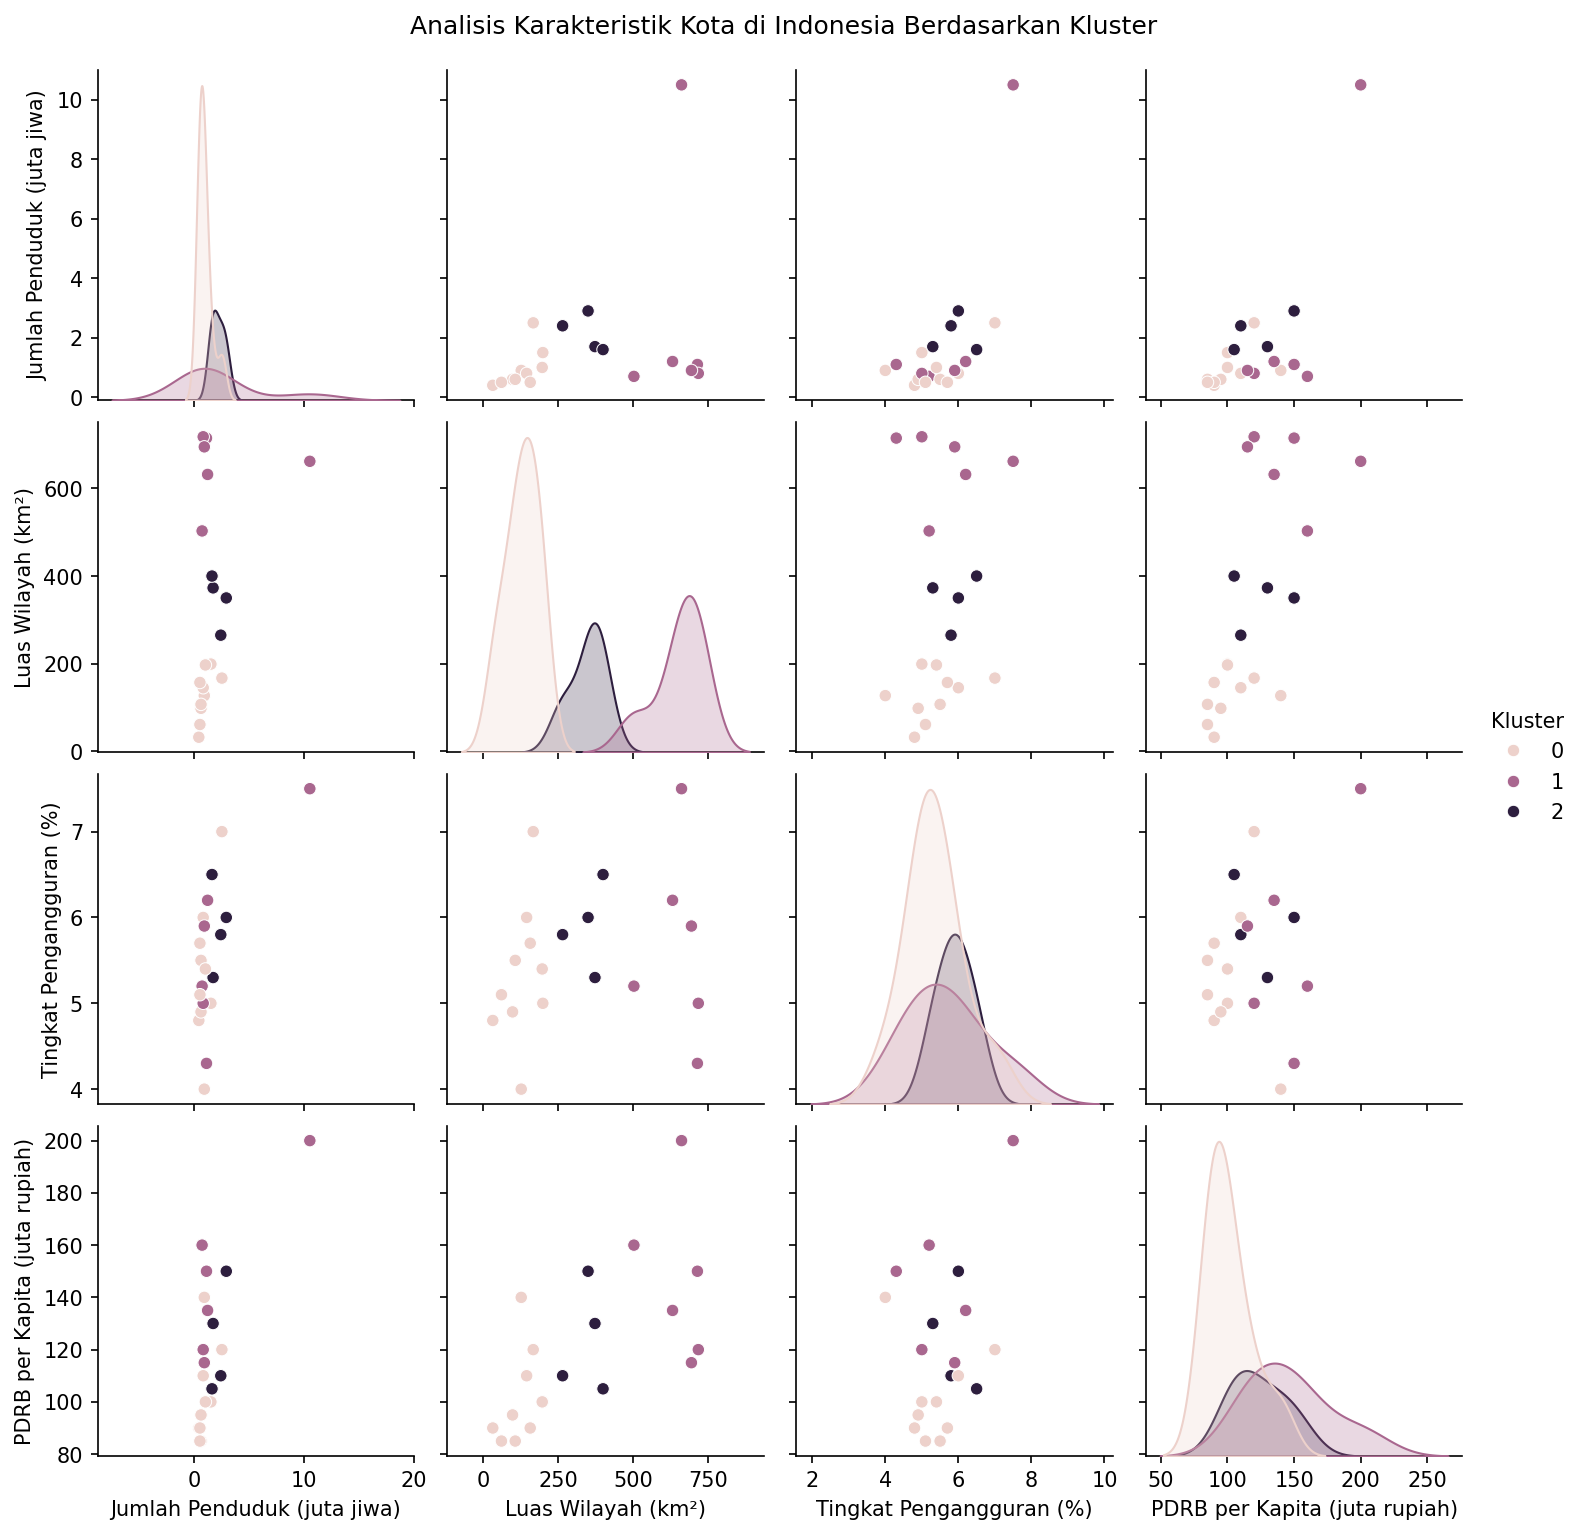

In [23]:
sns.pairplot(df, hue='Kluster', vars=['Jumlah Penduduk (juta jiwa)', 
                                        'Luas Wilayah (km²)', 
                                        'Tingkat Pengangguran (%)', 
                                        'PDRB per Kapita (juta rupiah)'])
plt.suptitle('Analisis Karakteristik Kota di Indonesia Berdasarkan Kluster', y=1.02)
plt.show()